In [9]:
# Importind necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px

# Loading the datasets
air_quality_df = pd.read_csv(r'C:\Users\HP\Downloads\Air_Quality_Nairobi.csv')
energy_consumption_df = pd.read_csv(r'C:\Users\HP\Downloads\Energy_Consumption_Africa.csv')
population_density_df = pd.read_csv(r'C:\Users\HP\Downloads\Population_Density_Africa.csv')
traffic_data_df = pd.read_csv(r'C:\Users\HP\Downloads\Traffic_Data_Accra.csv')



# Displaying first few rows to understand the data
print("Air Quality Data:")
print(air_quality_df.head())

print("\nEnergy Consumption Data:")
print(energy_consumption_df.head())

print("\nPopulation Density Data:")
print(population_density_df.head())

print("\nTraffic Data:")
print(traffic_data_df.head())


Air Quality Data:
         Date   Location       PM2.5       PM10        NO2
0  2024-01-01   Kilimani   28.361281  96.578181  71.999096
1  2024-01-02   Kilimani  143.696588  69.965196  17.360521
2  2024-01-03   Kilimani  140.013491  40.704370  62.356470
3  2024-01-04   Kilimani   41.466597  23.501715  72.357524
4  2024-01-05  Westlands   60.319207  44.618044  61.194980

Energy Consumption Data:
           City  Year  Energy_Consumption_MWh  Renewable_Energy_Percentage
0  Johannesburg  2022            93106.094082                    21.400082
1         Cairo  2019            56393.351409                     7.217163
2       Nairobi  2022             8553.309215                    38.961404
3  Johannesburg  2018            67953.345239                    16.571276
4       Nairobi  2023            48360.215505                    29.195758

Population Density Data:
           City  Population  Area_sq_km  Density_per_sq_km
0         Lagos    15000000        1171       12809.564475
1       

In [12]:
# Step 1: Standardize case and strip whitespace
air_quality_df['Location'] = air_quality_df['Location'].str.strip().str.lower()
traffic_data_df['Location'] = traffic_data_df['Location'].str.strip().str.lower()
energy_consumption_df['City'] = energy_consumption_df['City'].str.strip().str.lower()
population_density_df['City'] = population_density_df['City'].str.strip().str.lower()

# Step 2: Check unmatched locations
unmatched_locations = set(traffic_data_df['Location'].unique()) - set(air_quality_df['Location'].unique())
print("Unmatched Locations in Traffic Data not in Air Quality Data:", unmatched_locations)

# Step 3: Apply mappings to fix mismatched locations
location_mapping = {
    'kilimani ward': 'kilimani',
    'airport rd': 'airport road'
    # Add more mappings if necessary
}

# Apply mappings
air_quality_df['Location'] = air_quality_df['Location'].replace(location_mapping)
traffic_data_df['Location'] = traffic_data_df['Location'].replace(location_mapping)

# Step 4: Map traffic data locations to their corresponding cities
location_city_mapping = {
    'cantonments road': 'accra',
    'airport road': 'accra',
    'independence avenue': 'accra
}

traffic_data_df['City'] = traffic_data_df['Location'].map(location_city_mapping)

# Step 5: Merge traffic data with population density data
merged_df = pd.merge(traffic_data_df, population_density_df, left_on='City', right_on='City', how='left')

# Step 6: Check for remaining NaN values after the merge
print("Remaining NaN Values After Merge:")
print(merged_df[['Location', 'City', 'Population', 'Area_sq_km', 'Density_per_sq_km']].isnull().sum())

# Step 7: Identify any remaining unmatched locations
unmatched_locations = merged_df[merged_df['Location'].isnull()]
print("\nUnmatched Locations:\n", unmatched_locations)

# Step 8: Handle NaN values in 'Location' column after merging
merged_df['Location'].fillna('unknown', inplace=True)

# Step 9: K-Means Clustering for urban zones based on 'Average_Speed' and 'Traffic_Incidents'
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')  # Suppress the FutureWarning
merged_df['Zone_Cluster'] = kmeans.fit_predict(merged_df[['Average_Speed', 'Traffic_Incidents']])

# Step 10: Dimensionality Reduction (PCA) for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(merged_df[['Average_Speed', 'Traffic_Incidents']])
merged_df['PCA1'], merged_df['PCA2'] = pca_components[:, 0], pca_components[:, 1]

# Step 11: Checking the processed data again
print("\nProcessed Data:")
print(merged_df.head())



Unmatched Locations in Traffic Data not in Air Quality Data: {'airport road', 'cantonments road', 'independence avenue', 'ring road'}
Remaining NaN Values After Merge:
Location              0
City                 27
Population           27
Area_sq_km           27
Density_per_sq_km    27
dtype: int64

Unmatched Locations:
 Empty DataFrame
Columns: [Date, Location, Time_of_Day, Traffic_Incidents, Average_Speed, City, Population, Area_sq_km, Density_per_sq_km]
Index: []

Processed Data:
         Date             Location Time_of_Day  Traffic_Incidents  \
0  2024-01-01     cantonments road       Night                  7   
1  2024-01-02         airport road     Morning                  8   
2  2024-01-03  independence avenue       Night                  4   
3  2024-01-04         airport road     Evening                  6   
4  2024-01-05     cantonments road     Evening                  3   

   Average_Speed   City  Population  Area_sq_km  Density_per_sq_km  \
0      50.073363  accra   

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


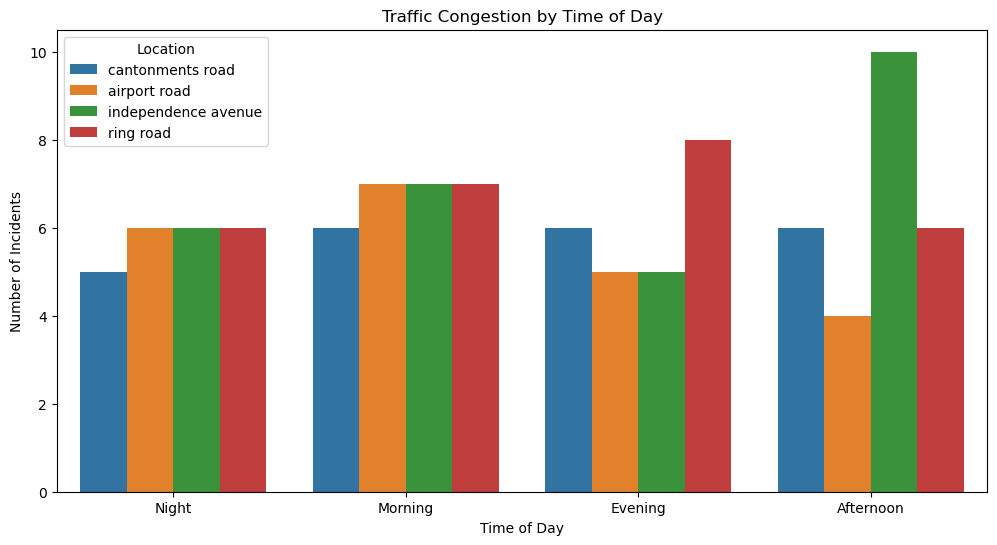

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


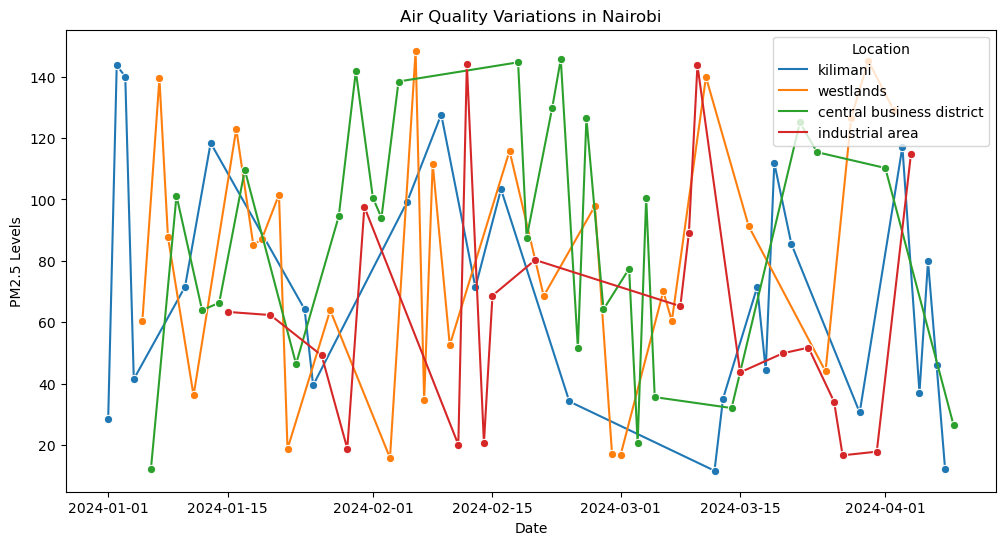

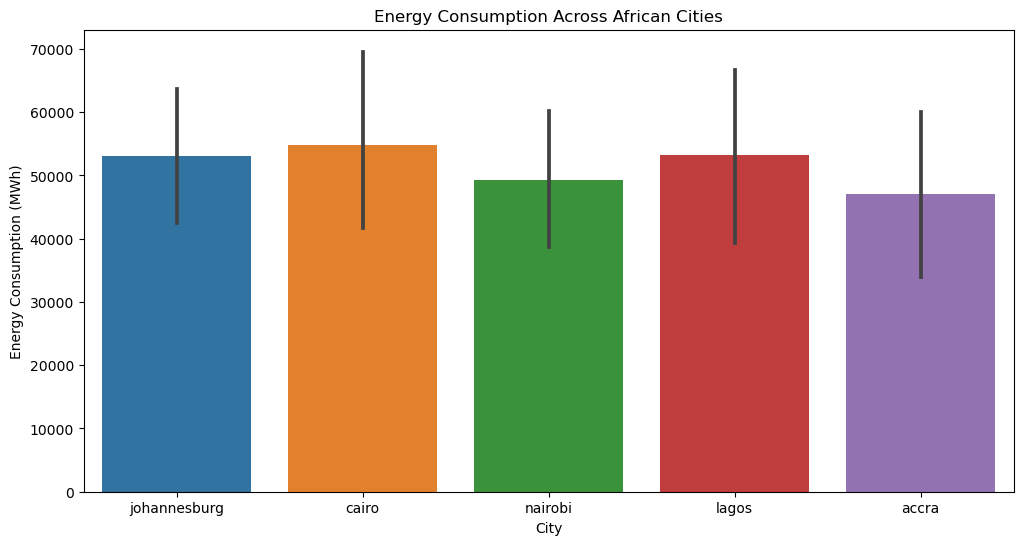

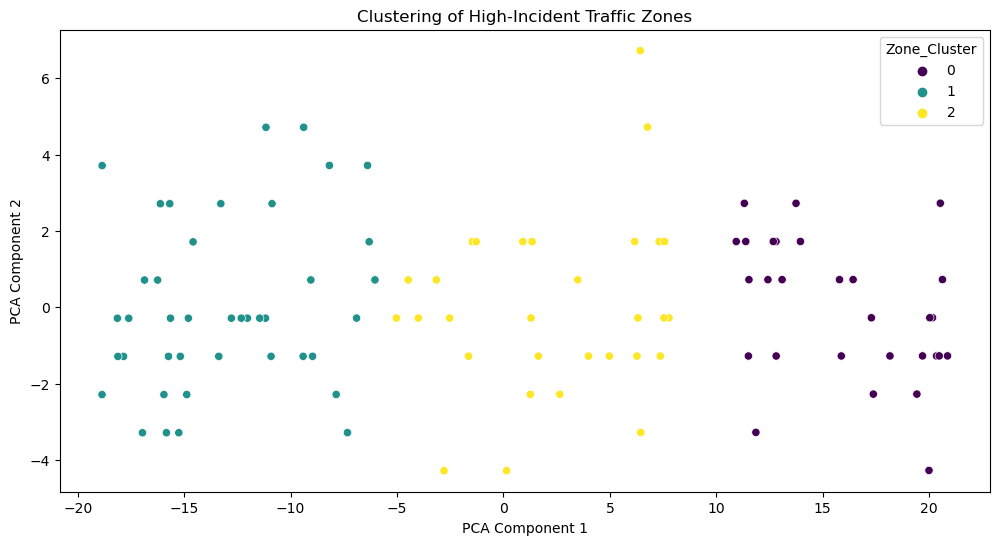

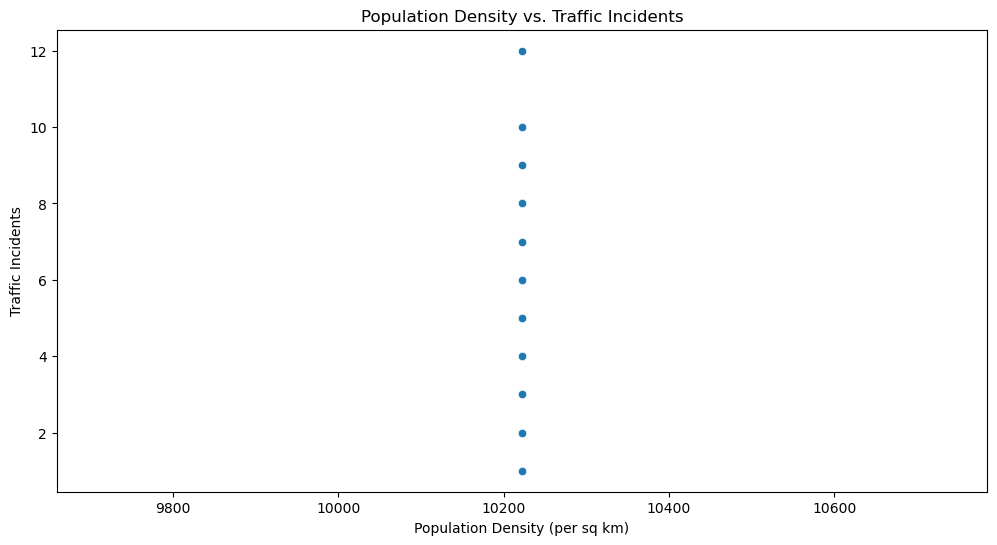

In [25]:
# Traffic Congestion Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=traffic_data_df, x='Time_of_Day', hue='Location')
plt.title('Traffic Congestion by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.show()

# Air Quality Variations Analysis
air_quality_df['Date'] = pd.to_datetime(air_quality_df['Date'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=air_quality_df, x='Date', y='PM2.5', hue='Location', marker='o')
plt.title('Air Quality Variations in Nairobi')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels')
plt.show()


# Energy Consumption Patterns
energy_consumption_df['City'] = energy_consumption_df['City'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data=energy_consumption_df, x='City', y='Energy_Consumption_MWh')
plt.title('Energy Consumption Across African Cities')
plt.xlabel('City')
plt.ylabel('Energy Consumption (MWh)')
plt.show()

# Clustering of High-Incident Traffic Zones
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='PCA1', y='PCA2', hue='Zone_Cluster', palette='viridis')
plt.title('Clustering of High-Incident Traffic Zones')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# Correlation Between Population Density and Traffic Incidents
merged_df.dropna(subset=['Density_per_sq_km', 'Traffic_Incidents'], inplace=True)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='Density_per_sq_km', y='Traffic_Incidents')
plt.title('Population Density vs. Traffic Incidents')
plt.xlabel('Population Density (per sq km)')
plt.ylabel('Traffic Incidents')
plt.show()



Mean Squared Error: 789951730.199434
R-squared: -0.04491807677837234


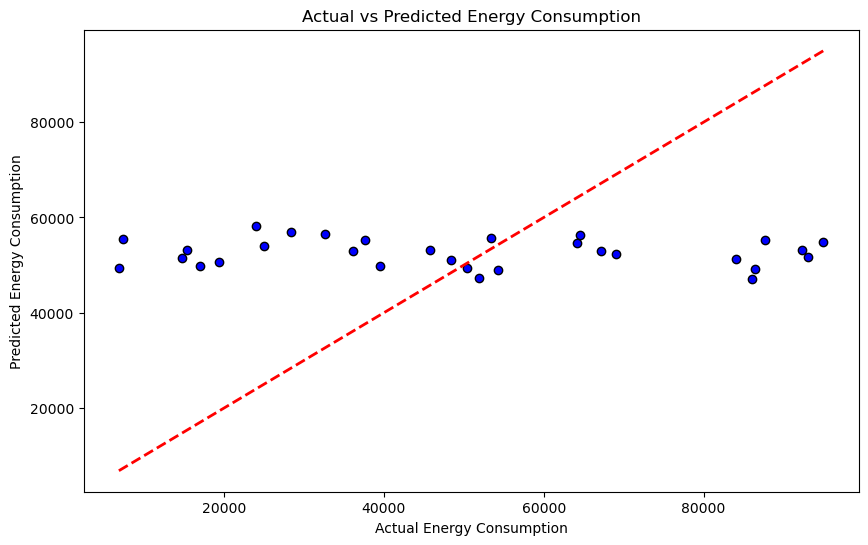

In [37]:

import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

combined_df = pd.merge(energy_consumption_df, population_density_df, on='City', how='left')

# Drop any rows with missing values in the columns of interest
combined_df.dropna(subset=['Density_per_sq_km', 'Renewable_Energy_Percentage', 'Energy_Consumption_MWh'], inplace=True)

# Feature Selection for Modeling
X = combined_df[['Density_per_sq_km', 'Renewable_Energy_Percentage']]
y = combined_df['Energy_Consumption_MWh']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()

